In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

%matplotlib inline

Работаем с данными от Hass Avocado Board ( динамика цен на авокадо в США ).

Описание данных: 

Date — дата

AveragePrice — средняя цена одного авокадо

Total Volume — количество проданных авокадо

4046 — количество проданных авокадо PLU* 4046

4225 — количество проданных авокадо PLU 4225

4770 — количество проданных авокадо PLU 4770

Total Bags — всего упаковок

Small Bags — маленькие упаковки

Large Bags — большие

XLarge Bags — очень большие

type — обычный или органический

year — год

Region — город или регион the city or region of the observation

*PLU — код товара (Product Lookup code)

Стоит учесть, что в датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные.

In [2]:
sns.set(
    font_scale=2, 
    style     ='whitegrid',
    rc        ={'figure.figsize':(20,7)} 
)

In [3]:
avocado_mean = pd.read_csv('avocado_mean.csv',index_col='Date', parse_dates=['Date'])

In [4]:
avocado_mean.head(5)

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.370648
2015-01-18      1.391111
2015-01-25      1.397130
2015-02-01      1.247037

- Посчитаем скользящее среднее цены авокадо с окном window = 3, найдем максимальное значение. 

<AxesSubplot: xlabel='Date'>

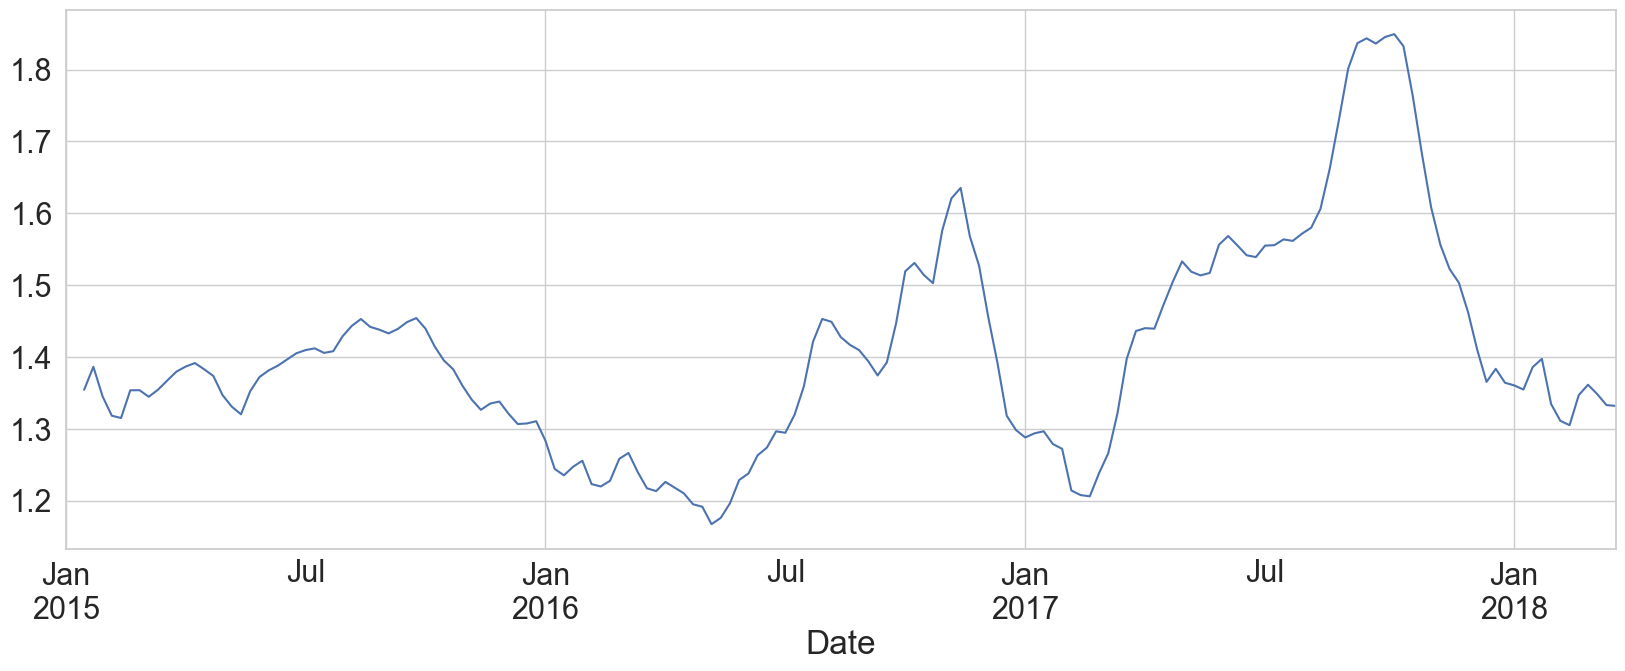

In [5]:
avocado_mean.AveragePrice.rolling(window=3).mean().plot()

In [6]:
max_mean_average_price = avocado_mean.AveragePrice.rolling(window=3).mean().max().round(2)
max_mean_average_price

1.85

Таким образом, максимальное значение скользящего среднего цены авокадо с окном 3 составляется 1.85.

In [7]:
#поменяв значение min_period мы можем избавится от NaN - ов в начале.
avocado_mean.AveragePrice.rolling(window=3, min_periods=1).mean()

Date
2015-01-04    1.301296
2015-01-11    1.335972
2015-01-18    1.354352
2015-01-25    1.386296
2015-02-01    1.345093
                ...   
2018-02-25    1.346914
2018-03-04    1.361296
2018-03-11    1.348302
2018-03-18    1.332994
2018-03-25    1.331883
Name: AveragePrice, Length: 169, dtype: float64

<AxesSubplot: xlabel='Date'>

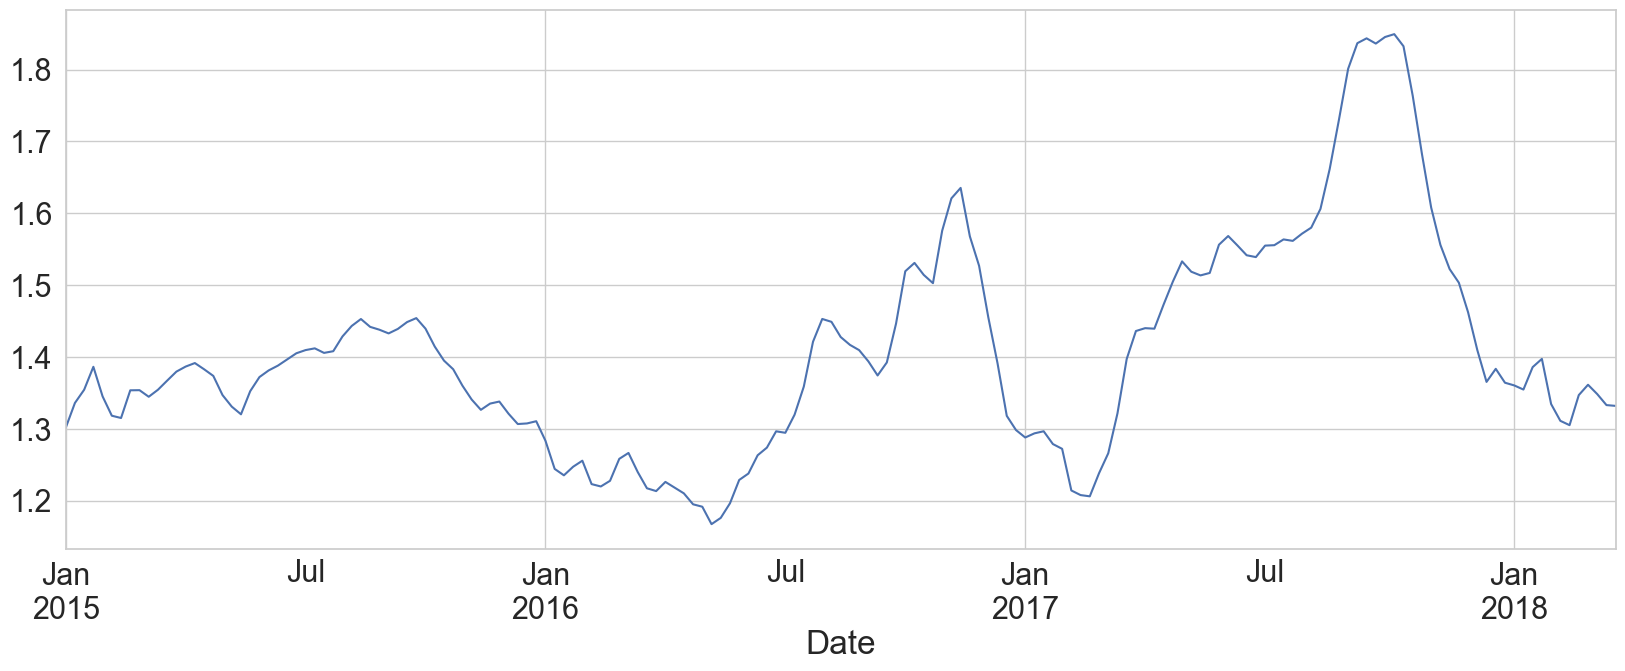

In [8]:
avocado_mean.AveragePrice.rolling(window=3, min_periods=1).mean().plot()

<AxesSubplot: xlabel='Date'>

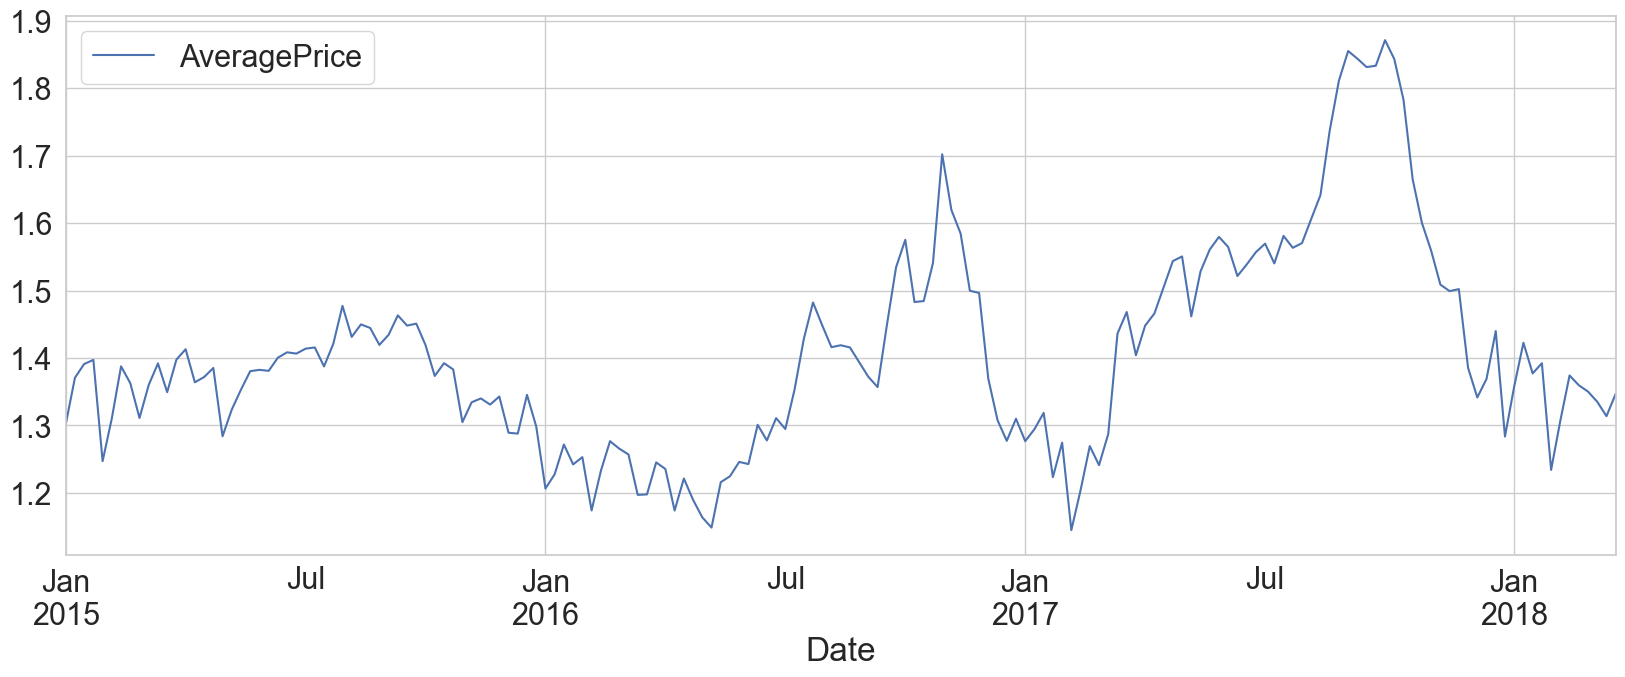

In [9]:
#изначально график средней цены авокадо выглядит так
avocado_mean.plot()

Идея: Чем больше размер окна - тем более сглаженным получается график.

Скользящее среднее чаще всего применяют, чтобы получить сглаженную линию тренда.


<AxesSubplot: xlabel='Date'>

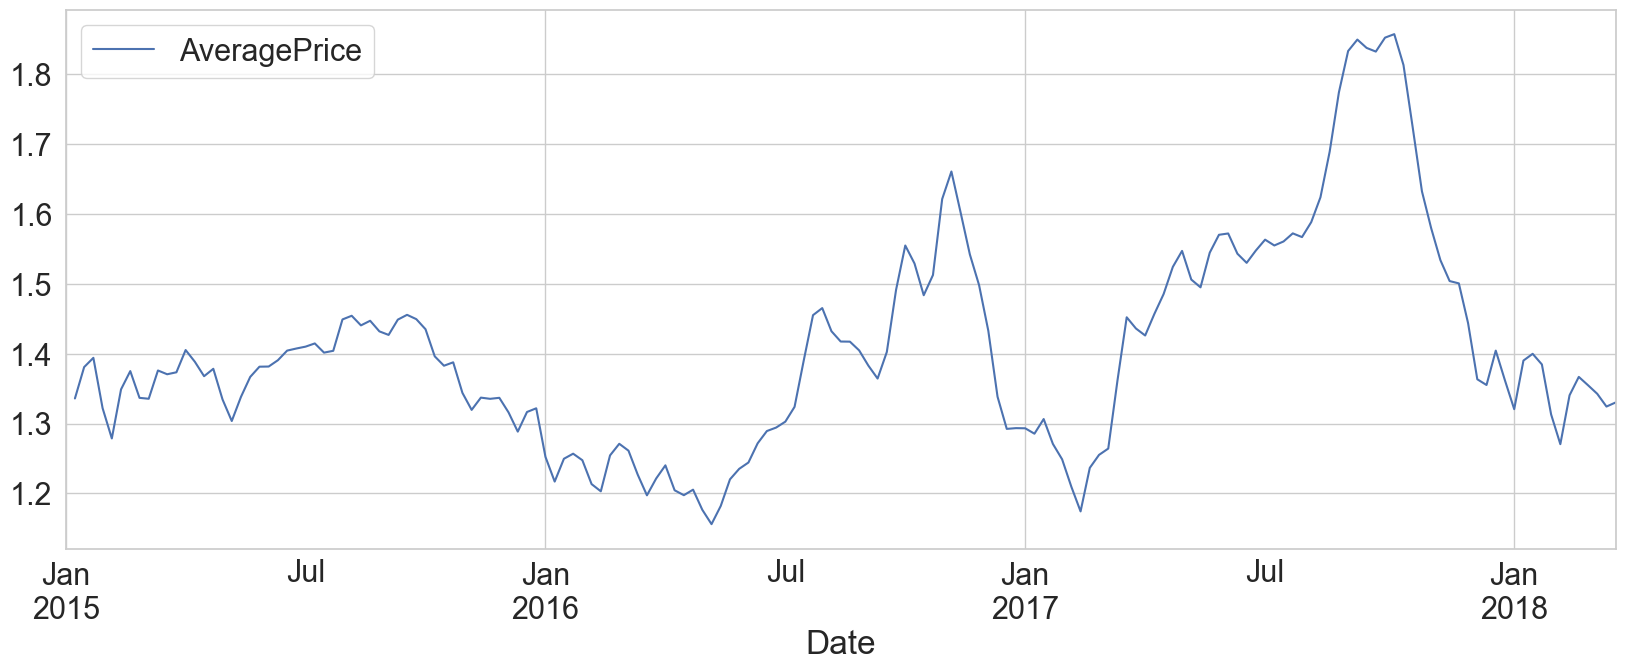

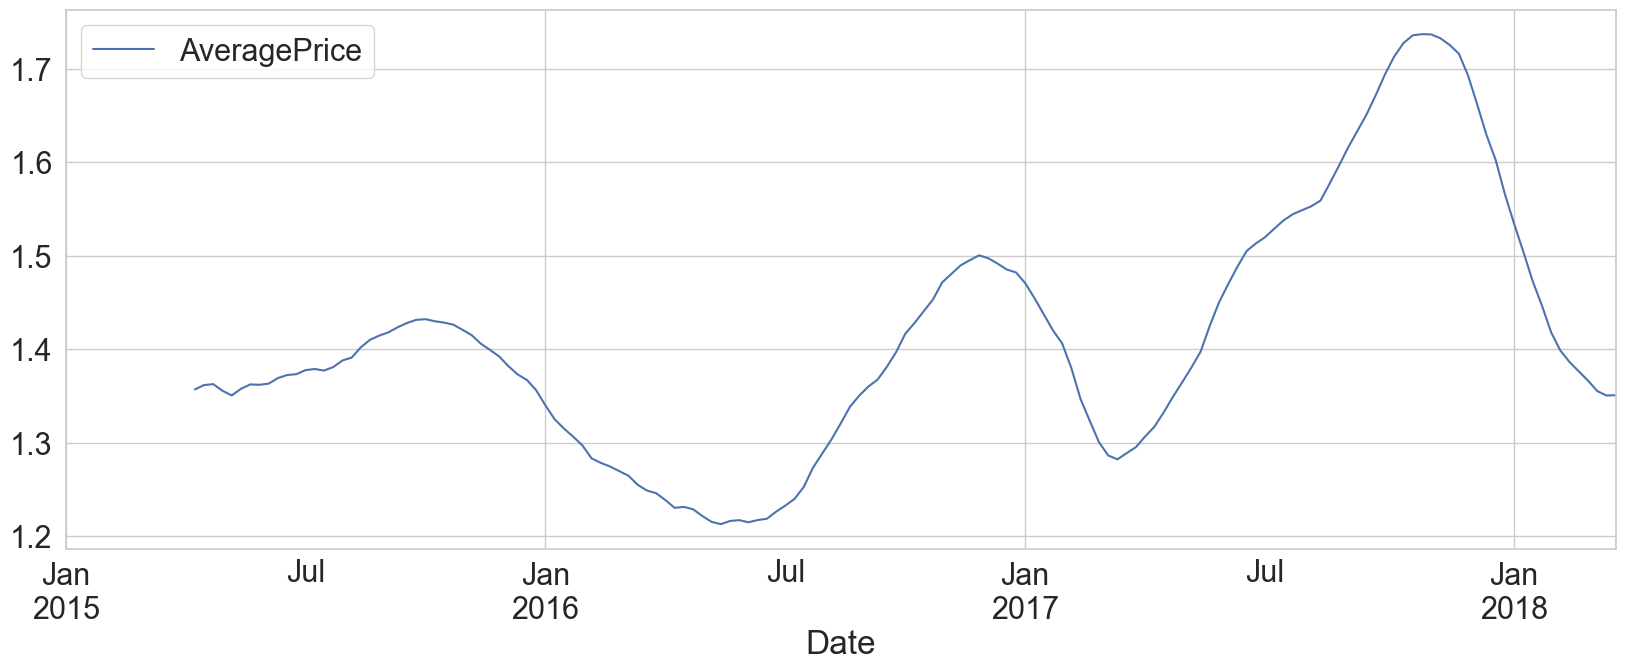

In [10]:
avocado_mean.rolling(2).mean().plot()
avocado_mean.rolling(15).mean().plot()

- Построим графики скользящего среднего с разными параметрами window (2, 4, 10, 50), посмотрим на различные изменения.

In [12]:
avo_mean_2 = avocado_mean.rolling(2).mean()
avo_mean_4 = avocado_mean.rolling(4).mean()
avo_mean_10 = avocado_mean.rolling(10).mean()
avo_mean_50 = avocado_mean.rolling(50).mean()

<AxesSubplot: xlabel='Date', ylabel='AveragePrice'>

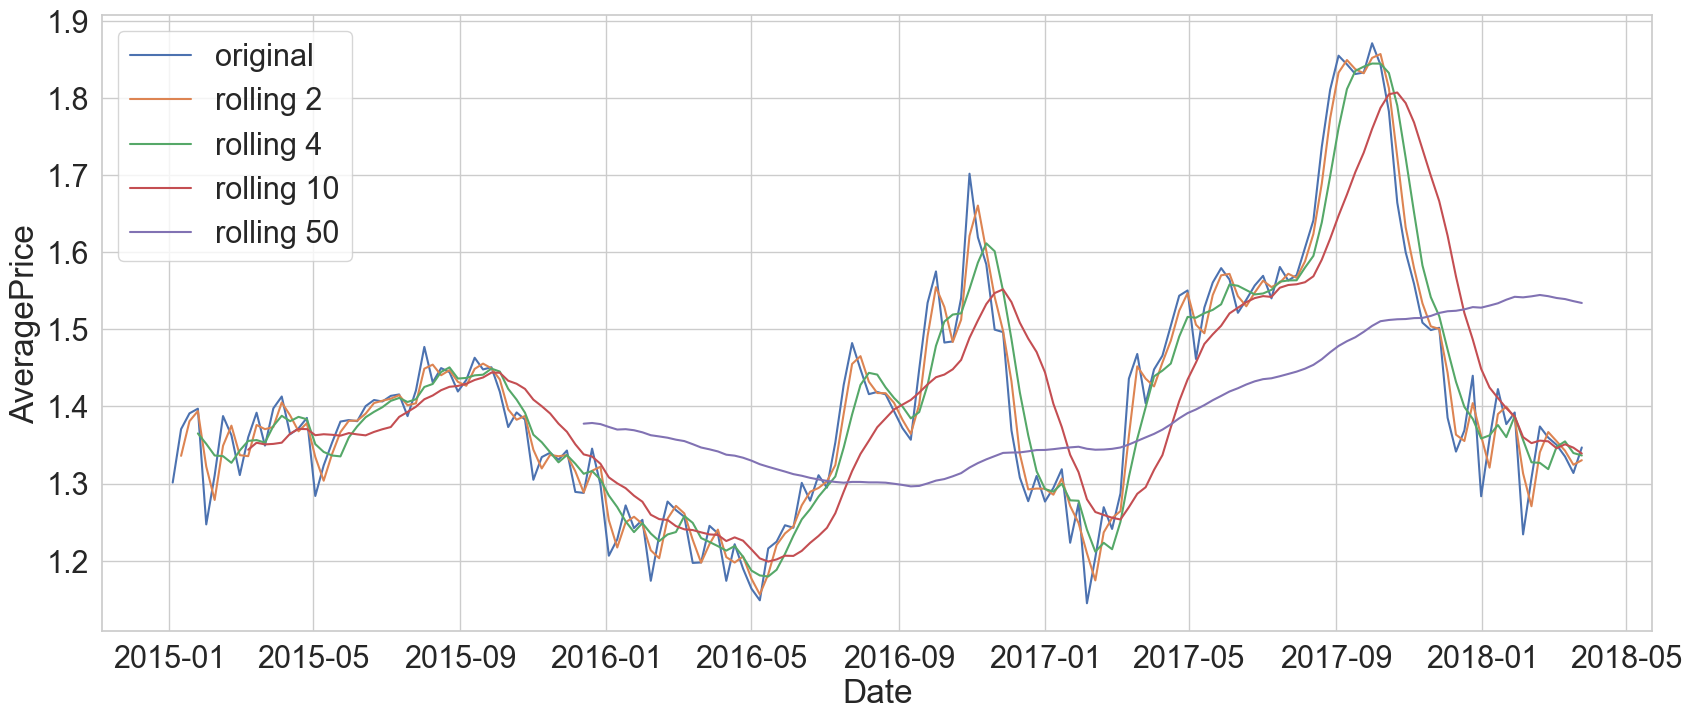

In [13]:
# 1 вариант построения графиков

plt.figure(figsize=(20,8))

sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label='original')

sns.lineplot(x=avo_mean_2.index, y=avo_mean_2.AveragePrice, label='rolling 2')

sns.lineplot(x=avo_mean_4.index, y=avo_mean_4.AveragePrice, label='rolling 4')

sns.lineplot(x=avo_mean_10.index, y=avo_mean_10.AveragePrice, label='rolling 10')

sns.lineplot(x=avo_mean_50.index, y=avo_mean_50.AveragePrice, label='rolling 50')



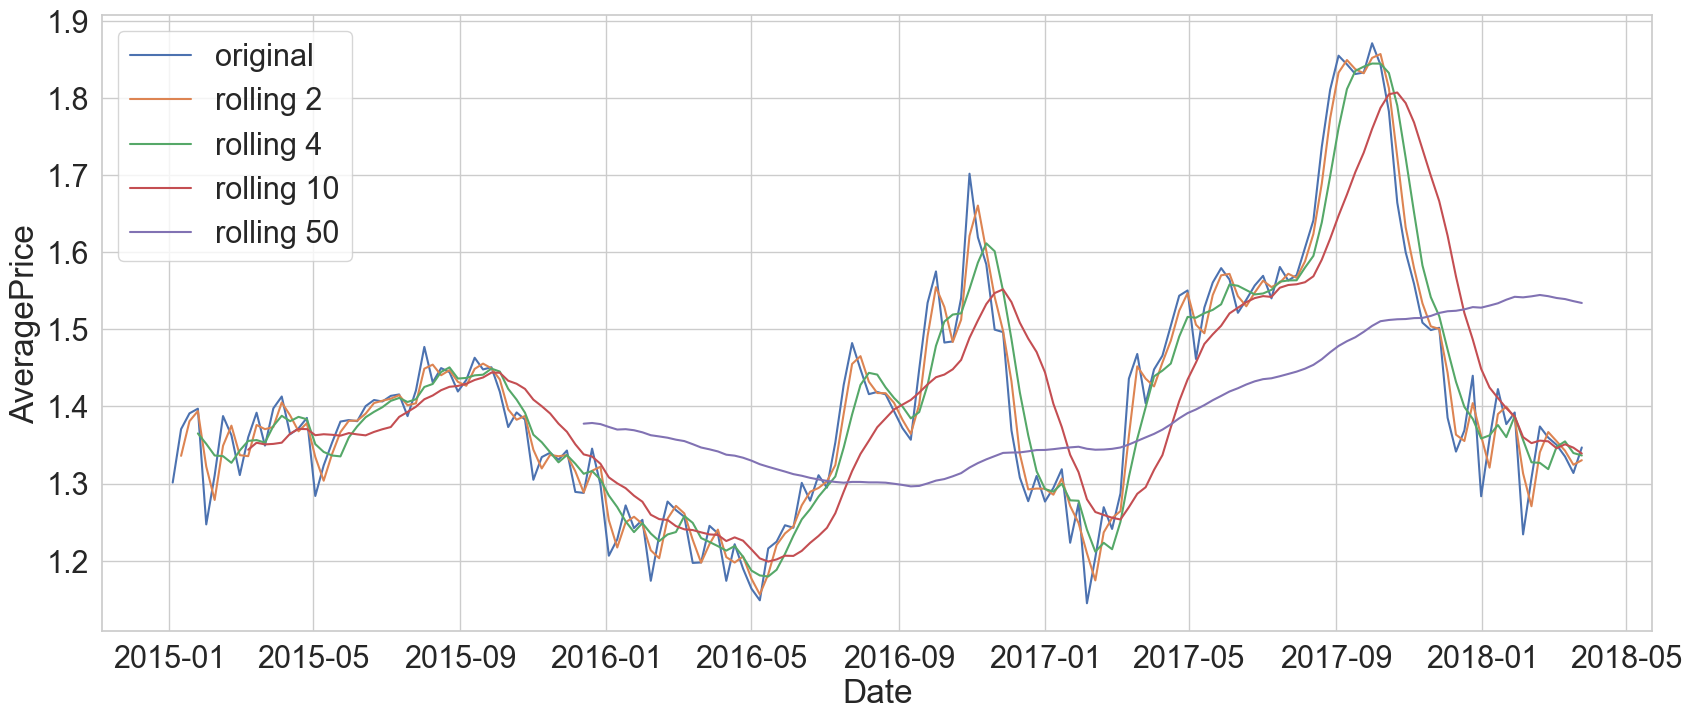

In [14]:
# 2 вариант построения графиков
plt.figure(figsize=(20,8))

sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label='original')
windows = [2,4,10, 50]
for window in windows:
    tdf = avocado_mean.rolling(window).mean()
    sns.lineplot(x=tdf.index, y=tdf.AveragePrice, label=f'rolling {window}')

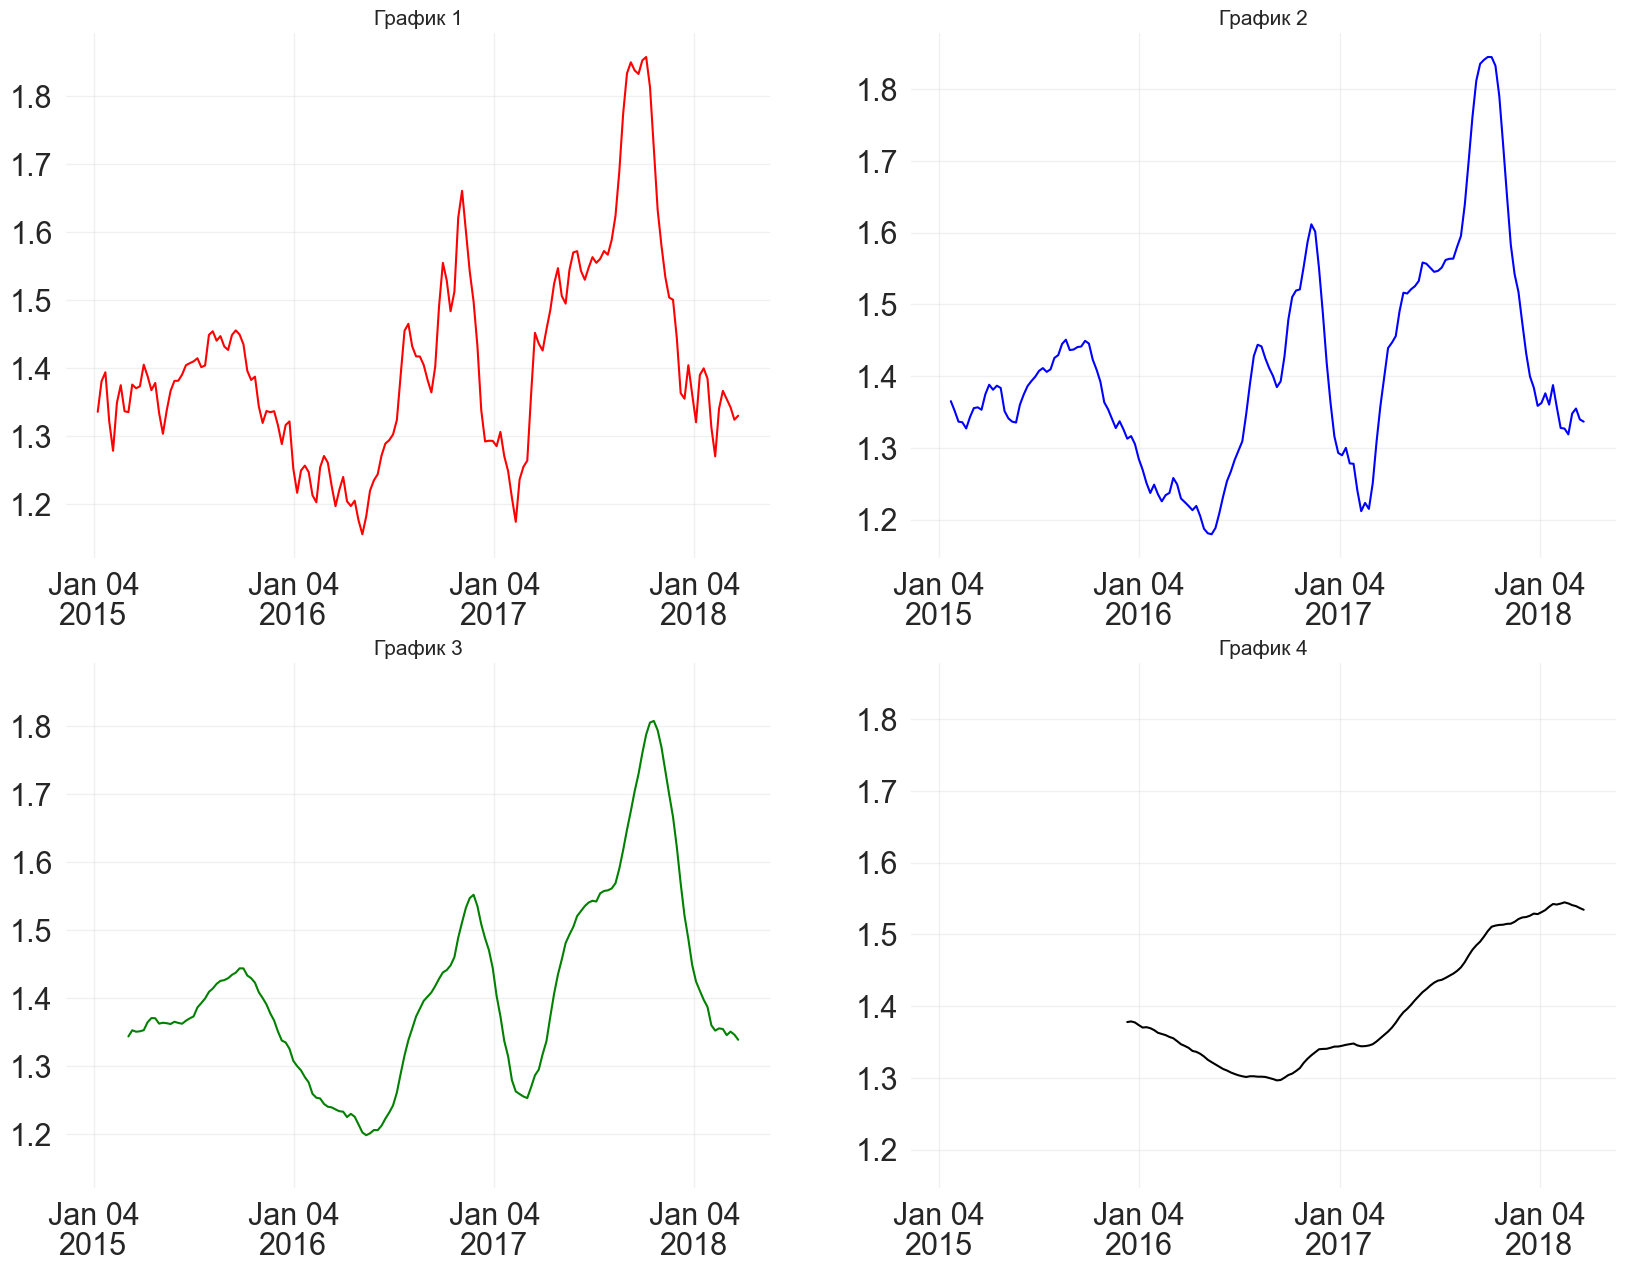

In [15]:
# 3 вариант построения графиков

import matplotlib.dates as mdates
#nrows - число строк
#ncols - число колонок
#figsize - размер графика
#sharey - будет ли ось y общей для графиков и между какими 
#sharex - тоже самое для x
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15), sharey='col', sharex=True)

windows = [2, 4, 10, 50]
colors = ['red', 'blue', 'green', 'black']

#axes.flatten() - переводим матрицу в одномерный массив, чтобы по нему
#итерироваться
for window, ax, color in zip(windows, axes.flatten(), colors):
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
    
for ax in axes.flatten():
    
    #удаляем рамку
    ax.set_frame_on(False)
    
    #устанвливаем major locator - 4 январ ядля каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    
    #показыват ьв формате сокращенного названия месяца и дня
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    #под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    
    #показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    
    #делаем сетку графика серой и полупрозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
for name, ax in zip([str(i) for i in range(1,5)], axes.flatten()):
    ax.set_title( f'График {name}', fontdict = { 'fontsize': 15})
    #ax.set(title=f'Гр {name}')
    ax.tick_params(labelbottom=True, which='both')
    
plt.show()

- Следующая задача состоит в том, что необходимо дать характеристику каждого параметра функции Dataframe.rolling.

window - размер окна. Число наблюдений используемых для подсчета какой - либо статистики.

min_periods- минимальное число наблюдений находящихся в окне необходимых для подсчета значения ( если меньше - возвращается Nan). Значение по умолчанию равно размеру окна.

center - позволяет использовать центрированное скользящее среднее.

win_type - тип окна. Если None, то все наблюдения имеют равный вес.

on - колонка, на основе которой считать скользящее окно, если не на основе индексов.

axis - осень ( столбцы или строки ).

closed - сделать интервал закрытым справа, слева, на обеих или ни на одной точке. По умолчанию используется значение "справа". Для фиксированных - "оба".


In [16]:
#shift + tab
#avocado_mean.rolling()

In [17]:
avocado_mean.rolling(5, min_periods=3).mean()

AveragePrice
Date                    
2015-01-04           NaN
2015-01-11           NaN
2015-01-18      1.354352
2015-01-25      1.365046
2015-02-01      1.341444
...                  ...
2018-02-25      1.333407
2018-03-04      1.325000
2018-03-11      1.345204
2018-03-18      1.346537
2018-03-25      1.341093

[169 rows x 1 columns]

In [18]:
avocado_mean.head()

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.370648
2015-01-18      1.391111
2015-01-25      1.397130
2015-02-01      1.247037

In [19]:
avocado_mean.rolling(3).mean()

AveragePrice
Date                    
2015-01-04           NaN
2015-01-11           NaN
2015-01-18      1.354352
2015-01-25      1.386296
2015-02-01      1.345093
...                  ...
2018-02-25      1.346914
2018-03-04      1.361296
2018-03-11      1.348302
2018-03-18      1.332994
2018-03-25      1.331883

[169 rows x 1 columns]

In [20]:
avocado_mean.rolling(3, center=True).mean()
# не для последнего значения считаем, а для среднего ( значения сдвинулись наверх)

AveragePrice
Date                    
2015-01-04           NaN
2015-01-11      1.354352
2015-01-18      1.386296
2015-01-25      1.345093
2015-02-01      1.318210
...                  ...
2018-02-25      1.361296
2018-03-04      1.348302
2018-03-11      1.332994
2018-03-18      1.331883
2018-03-25           NaN

[169 rows x 1 columns]

In [21]:
#win_type
#win = 3

#исходные данные
1.301296
1.370648
1.391111

#считаем среднее
mean = (1.301296 + 1.370648 + 1.391111)/3

#считаем взвешенное среднее
w1 = 1
w2 = 1
w3 = 1
w_mean = (w1*1.301296 + w2*1.370648 + w3*1.391111)/3



- В следующей задаче необходимо использовать агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее.

In [42]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.353310
2015-01-18      1.379480
2015-01-25      1.391394
2015-02-01      1.294758
...                  ...
2018-02-25      1.356212
2018-03-04      1.352194
2018-03-11      1.340793
2018-03-18      1.322734
2018-03-25      1.338812

[169 rows x 1 columns]

<AxesSubplot: xlabel='Date'>

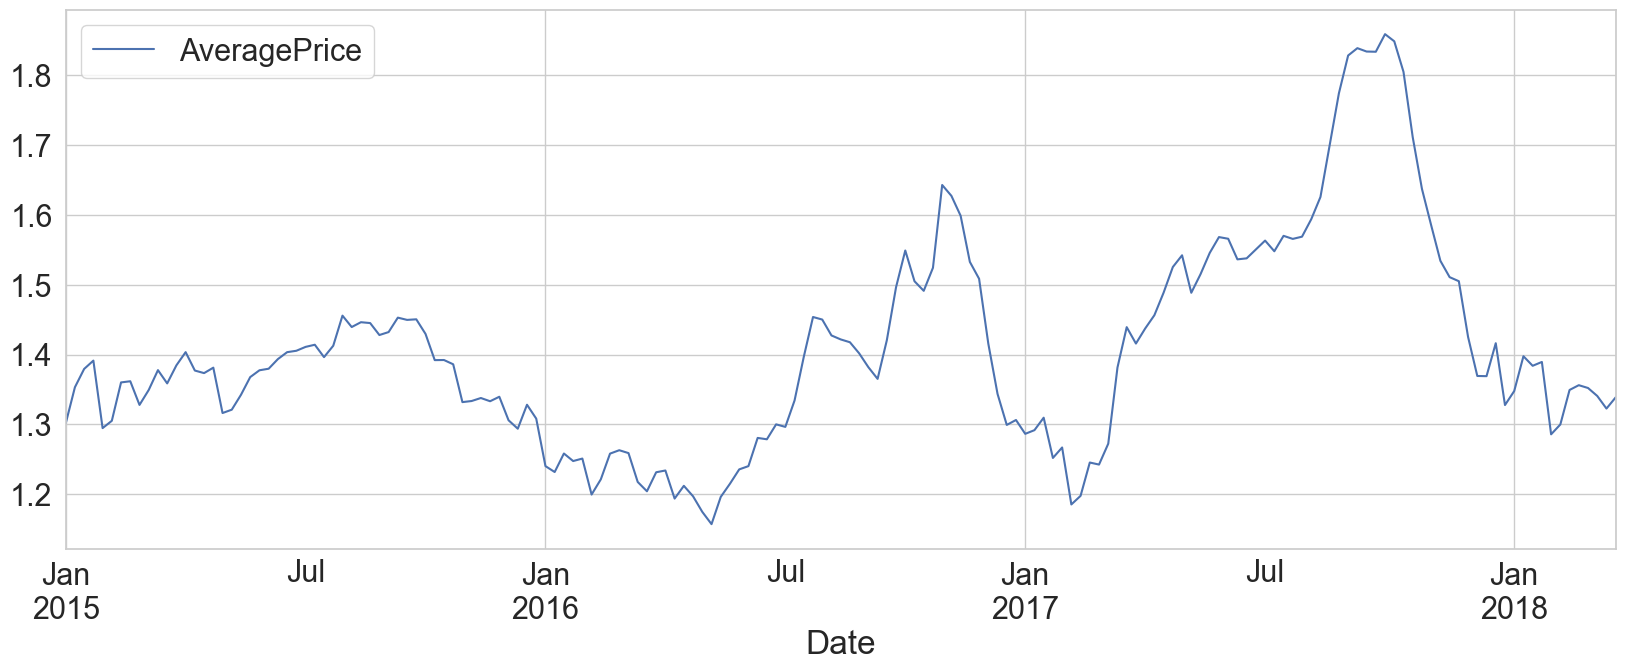

In [41]:
#span - отвечает за угасание значения
avocado_ewm.plot()

In [59]:
avocado_mean.head(5)

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.370648
2015-01-18      1.391111
2015-01-25      1.397130
2015-02-01      1.247037

In [60]:
#в отличии от предыдущих рассчитывает каждое значение на оснвое всех предыдущих
#т.е. последнее знач мы рассчитаем по всему датасету
avocado_mean.expanding().mean()

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.335972
2015-01-18      1.354352
2015-01-25      1.365046
2015-02-01      1.341444
...                  ...
2018-02-25      1.407673
2018-03-04      1.407327
2018-03-11      1.406894
2018-03-18      1.406340
2018-03-25      1.405988

[169 rows x 1 columns]

In [61]:
avocado_mean.mean()

AveragePrice    1.405988
dtype: float64

- Теперь нам необходимо из другого фрейма данных для авокадо типа organic (type) в Чикаго (region) посчитать скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Визуализируем полученные результаты на графике.

In [24]:
avocado_full = pd.read_csv('avocado_full.csv',index_col='Date', parse_dates=['Date'])
avocado_full

AveragePrice  Total Volume        4046       4225       4770  \
Date                                                                       
2015-01-04          1.75      27365.89     9307.34    3844.81     615.28   
2015-01-04          1.49      17723.17     1189.35   15628.27       0.00   
2015-01-04          1.68       2896.72      161.68     206.96       0.00   
2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70   
2015-01-04          1.64       1505.12        1.27    1129.50       0.00   
...                  ...           ...         ...        ...        ...   
2018-03-25          1.36     908202.13   142681.06  463136.28  174975.75   
2018-03-25          0.70    9010588.32  3999735.71  966589.50   30130.82   
2018-03-25          1.42     163496.70    29253.30    5080.04       0.00   
2018-03-25          1.70     190257.38    29644.09   70982.10       0.00   
2018-03-25          1.34    1774776.77    63905.98  908653.71     843.45   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36         0.00       organic   
2015-01-04      905.55      905.55        0.00         0.00       organic   
2015-01-04     2528.08     2528.08        0.00         0.00       organic   
2015-01-04    14925.18    11264.80     3660.38         0.00  conventional   
2015-01-04      374.35      186.67      187.68         0.00       organic   
...                ...         ...         ...          ...           ...   
2018-03-25   127409.04   103579.41    22467.04      1362.59  conventional   
2018-03-25  4014132.29  3398569.92   546409.74     69152.63  conventional   
2018-03-25   129163.36   109052.26    20111.10         0.00       organic   
2018-03-25    89631.19    89424.11      207.08         0.00       organic   
2018-03-25   801373.63   774634.09    23833.93      2905.61  conventional   

            year              region  
Date                                  
2015-01-04  2015           Southeast  
2015-01-04  2015             Chicago  
2015-01-04  2015  HarrisburgScranton  
2015-01-04  2015          Pittsburgh  
2015-01-04  2015               Boise  
...          ...                 ...  
2018-03-25  2018             Chicago  
2018-03-25  2018        SouthCentral  
2018-03-25  2018        SouthCentral  
2018-03-25  2018          California  
2018-03-25  2018             NewYork  

[18249 rows x 12 columns]

In [64]:
organic_Chicago = avocado_full.query('type == "organic" and region == "Chicago"').AveragePrice 
rolling_mean_4 = organic_Chicago.rolling(window=4, min_periods=1).mean()
ewm_4 = organic_Chicago.ewm(span=4).mean()

In [65]:
rolling_mean_4

Date
2015-01-04    1.490000
2015-01-11    1.640000
2015-01-18    1.696667
2015-01-25    1.730000
2015-02-01    1.737500
                ...   
2018-02-25    1.652500
2018-03-04    1.652500
2018-03-11    1.655000
2018-03-18    1.655000
2018-03-25    1.657500
Name: AveragePrice, Length: 169, dtype: float64

In [66]:
ewm_4

Date
2015-01-04    1.490000
2015-01-11    1.677500
2015-01-18    1.745102
2015-01-25    1.784118
2015-02-01    1.669563
                ...   
2018-02-25    1.676654
2018-03-04    1.653992
2018-03-11    1.656395
2018-03-18    1.657837
2018-03-25    1.670702
Name: AveragePrice, Length: 169, dtype: float64

<AxesSubplot: xlabel='Date', ylabel='AveragePrice'>

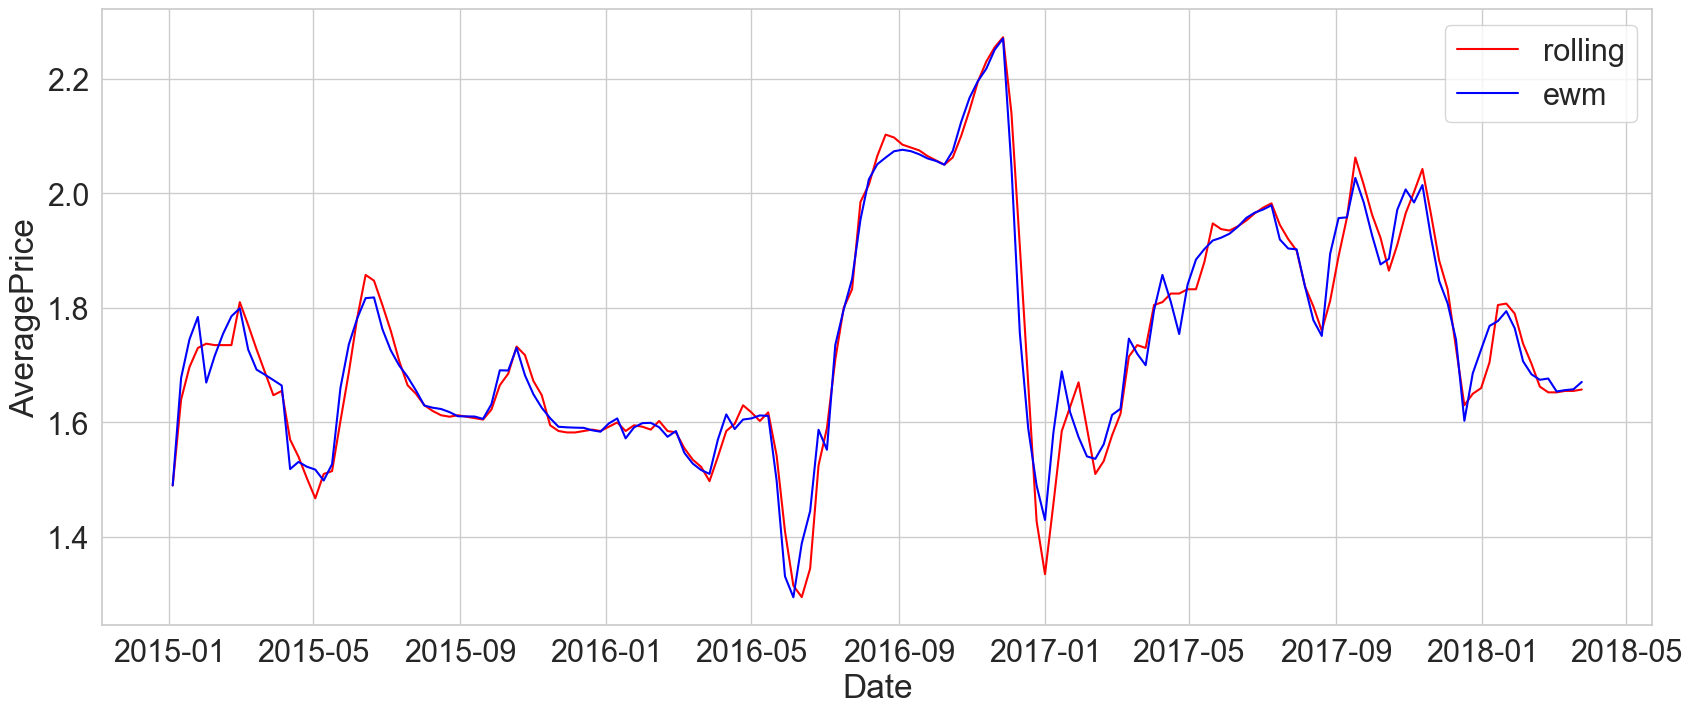

In [68]:
plt.figure(figsize=(20,8))
sns.lineplot(x=rolling_mean_4.index, y=rolling_mean_4, color = 'red', label='rolling')
sns.lineplot(x=ewm_4.index, y=ewm_4, color = 'blue', label='ewm')


In [74]:
avocado_price_21_08_2016_rolling = rolling_mean_4['2016-08-21'].round(3)
avocado_price_21_08_2016_rolling

2.102

In [75]:
avocado_price_21_08_2016_ewm = ewm_4['2016-08-21'].round(3)
avocado_price_21_08_2016_ewm

2.062

In [77]:
avocado_price_19_02_2017_ewm = ewm_4['2017-02-19'].round(3)
avocado_price_19_02_2017_ewm

1.562

In [79]:
avocado_price_19_02_2017_rolling = rolling_mean_4['2017-02-19'].round(3)
avocado_price_19_02_2017_rolling

1.533

По графику видно, что ряд, полученный с помощью экспоненциального скользящего среднего является более сглаженным.

Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна 2.102, что больше чем при использовании экспоненциального.

19 февраля 2017 среднее, полученное с помощью ewm() равнялось 1.562, и было больше чем при использовании rolling(), для которого значение было равно 1.533.



In [88]:
#вариация решения этой задачи используя более гибкий код
df_organic_Chicago = avocado_full.query('type == "organic" and region == "Chicago"')
df_organic_Chicago['rolling_4'] = df_organic_Chicago.AveragePrice.rolling(window=4, min_periods=1).mean()
df_organic_Chicago['ewm_4'] = df_organic_Chicago.AveragePrice.ewm(span=4).mean()

C:\Users\stale\AppData\Local\Temp\ipykernel_13260\3101205449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organic_Chicago['rolling_4'] = df_organic_Chicago.AveragePrice.rolling(window=4, min_periods=1).mean()
C:\Users\stale\AppData\Local\Temp\ipykernel_13260\3101205449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organic_Chicago['ewm_4'] = df_organic_Chicago.AveragePrice.ewm(span=4).mean()


In [142]:
df_organic_Chicago.head(5)

AveragePrice  Total Volume     4046      4225  4770  Total Bags  \
Date                                                                          
2015-01-04          1.49      17723.17  1189.35  15628.27   0.0      905.55   
2015-01-11          1.79      12915.74  1426.75  10900.10   0.0      588.89   
2015-01-18          1.81      12499.87  1154.81  10830.61   0.0      514.45   
2015-01-25          1.83      10951.51   711.63   9515.44   0.0      724.44   
2015-02-01          1.52      14391.05  1363.35  11835.47   0.0     1192.23   

            Small Bags  Large Bags  XLarge Bags     type  year   region  \
Date                                                                      
2015-01-04      905.55         0.0          0.0  organic  2015  Chicago   
2015-01-11      588.89         0.0          0.0  organic  2015  Chicago   
2015-01-18      514.45         0.0          0.0  organic  2015  Chicago   
2015-01-25      724.44         0.0          0.0  organic  2015  Chicago   
2015-02-01     1192.23         0.0          0.0  organic  2015  Chicago   

            rolling_4     ewm_4  
Date                             
2015-01-04   1.490000  1.490000  
2015-01-11   1.640000  1.677500  
2015-01-18   1.696667  1.745102  
2015-01-25   1.730000  1.784118  
2015-02-01   1.737500  1.669563

<AxesSubplot: xlabel='Date'>

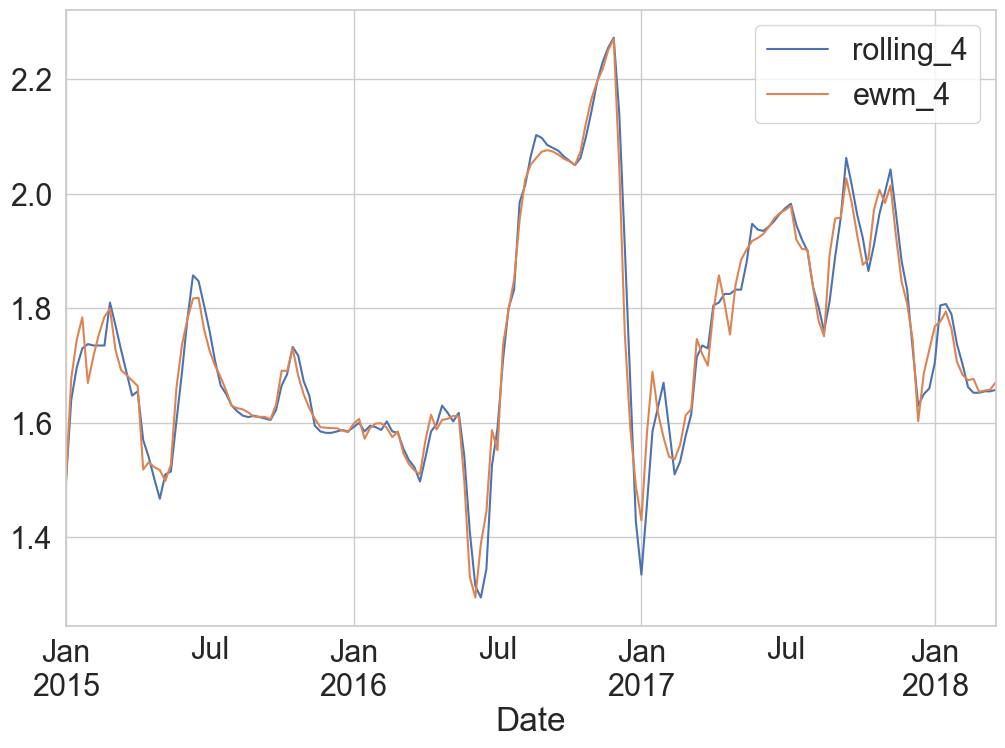

In [91]:
df_organic_Chicago[['rolling_4','ewm_4']].plot(figsize=(12,8))

In [92]:
#.loc['строка']
df_organic_Chicago.loc['2016-08-21', ['rolling_4', 'ewm_4']]

rolling_4      2.1025
ewm_4        2.062428
Name: 2016-08-21 00:00:00, dtype: object

In [93]:
df_organic_Chicago.loc['2017-02-19', ['rolling_4', 'ewm_4']]

rolling_4      1.5325
ewm_4        1.561849
Name: 2017-02-19 00:00:00, dtype: object

In [94]:
#несколько дат ( с февраля по март например)
df_organic_Chicago.loc['2017-02-01':'2017-03-01', ['rolling_4', 'ewm_4']]

rolling_4     ewm_4
Date                           
2017-02-05     1.5900  1.540691
2017-02-12     1.5100  1.536415
2017-02-19     1.5325  1.561849
2017-02-26     1.5775  1.613109

- Перейдем к работе с данными по опозданиям в заключении сделок. В csv файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. 

    Необходимо перевести колонку  delay в timedelta формат ( данные изначально нужно избавить от мусора '-'). 


In [108]:
delays = pd.read_csv('delays.csv')
delays 

client_id  company_id                        delay  revenue
0         2389        4240  -1 days -14:57:48.000000000   705436
1         7614        9544  -4 days -02:14:23.000000000   859266
2         2052        2427  -0 days -06:08:57.000000000   812416
3         9635        8054  -0 days -23:40:19.000000000   162312
4         8154        5503  -1 days -13:21:53.000000000   658844
..         ...         ...                          ...      ...
259       5837        2617  -0 days -05:32:08.000000000   602129
260       2384        2364  -3 days -23:27:14.000000000   910660
261       5146        3331  -1 days -15:22:34.000000000   401137
262       7203        5532  -2 days -17:15:02.000000000   308979
263       3822        9882  -1 days -15:50:29.000000000   877773

[264 rows x 4 columns]

In [109]:
delays.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [110]:
delays['delay'] = pd.to_timedelta(delays['delay'].str.replace('-', ''))

In [111]:
delays

client_id  company_id           delay  revenue
0         2389        4240 1 days 14:57:48   705436
1         7614        9544 4 days 02:14:23   859266
2         2052        2427 0 days 06:08:57   812416
3         9635        8054 0 days 23:40:19   162312
4         8154        5503 1 days 13:21:53   658844
..         ...         ...             ...      ...
259       5837        2617 0 days 05:32:08   602129
260       2384        2364 3 days 23:27:14   910660
261       5146        3331 1 days 15:22:34   401137
262       7203        5532 2 days 17:15:02   308979
263       3822        9882 1 days 15:50:29   877773

[264 rows x 4 columns]

In [112]:
delays.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

Теперь разобъем время на промежутки. Для начала на 3 интервала и посмотрим что они из себя представляют.


In [113]:
delays.head(5)

client_id  company_id           delay  revenue
0       2389        4240 1 days 14:57:48   705436
1       7614        9544 4 days 02:14:23   859266
2       2052        2427 0 days 06:08:57   812416
3       9635        8054 0 days 23:40:19   162312
4       8154        5503 1 days 13:21:53   658844

In [121]:
pd.cut(delays.delay, bins=3)

0      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
1           (3 days 08:05:36.333333333, 4 days 23:51:14]
2      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
3      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
4      (0 days 00:27:11.587000, 1 days 16:19:58.66666...
                             ...                        
259    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
260         (3 days 08:05:36.333333333, 4 days 23:51:14]
261    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
262    (1 days 16:19:58.666666666, 3 days 08:05:36.33...
263    (0 days 00:27:11.587000, 1 days 16:19:58.66666...
Name: delay, Length: 264, dtype: category
Categories (3, interval[timedelta64[ns], right]): [(0 days 00:27:11.587000, 1 days 16:19:58.66666... < (1 days 16:19:58.666666666, 3 days 08:05:36.33... < (3 days 08:05:36.333333333, 4 days 23:51:14]]

In [119]:
# 0 1 2 \ 3 4 5 6 \ 7 8 9....
# small \ medium \ large
pd.cut(delays.delay, bins=3)

In [120]:
delays.head(5)

client_id  company_id           delay  revenue  \
0       2389        4240 1 days 14:57:48   705436   
1       7614        9544 4 days 02:14:23   859266   
2       2052        2427 0 days 06:08:57   812416   
3       9635        8054 0 days 23:40:19   162312   
4       8154        5503 1 days 13:21:53   658844   

                                   delay_categorical  
0  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
1       (3 days 08:05:36.333333333, 4 days 23:51:14]  
2  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
3  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
4  (0 days 00:27:11.587000, 1 days 16:19:58.66666...

Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. 

Необходимо создать колонку delay_categorical, чтобы значения в ней были:


'less than 1 day' – время от 0 до 1 дня

'1-2 days' – от 1 до 2 дней

'2-3 days' – от 2 до 3 дней

'more than 3 days' – больше 3 дней


In [124]:
#это не то разделение, которое нам требуется 
pd.cut(delays.delay, bins=4)

0      (1 days 06:23:34.250000, 2 days 12:12:47.500000]
1             (3 days 18:02:00.750000, 4 days 23:51:14]
2      (0 days 00:27:11.587000, 1 days 06:23:34.250000]
3      (0 days 00:27:11.587000, 1 days 06:23:34.250000]
4      (1 days 06:23:34.250000, 2 days 12:12:47.500000]
                             ...                       
259    (0 days 00:27:11.587000, 1 days 06:23:34.250000]
260           (3 days 18:02:00.750000, 4 days 23:51:14]
261    (1 days 06:23:34.250000, 2 days 12:12:47.500000]
262    (2 days 12:12:47.500000, 3 days 18:02:00.750000]
263    (1 days 06:23:34.250000, 2 days 12:12:47.500000]
Name: delay, Length: 264, dtype: category
Categories (4, interval[timedelta64[ns], right]): [(0 days 00:27:11.587000, 1 days 06:23:34.250000] < (1 days 06:23:34.250000, 2 days 12:12:47.500000] < (2 days 12:12:47.500000, 3 days 18:02:00.750000] < (3 days 18:02:00.750000, 4 days 23:51:14]]

In [126]:
pd.to_timedelta('1d')

Timedelta('1 days 00:00:00')

In [130]:
delays.delay.max()

Timedelta('4 days 23:51:14')

In [131]:
bins = [pd.to_timedelta('0d'), 
        pd.to_timedelta('1d'), 
        pd.to_timedelta('2d'),
        pd.to_timedelta('3d'),
        pd.to_timedelta('100d')]

In [134]:
pd.cut(delays.delay, bins=bins)

0        (1 days 00:00:00, 2 days 00:00:00]
1      (3 days 00:00:00, 100 days 00:00:00]
2        (0 days 00:00:00, 1 days 00:00:00]
3        (0 days 00:00:00, 1 days 00:00:00]
4        (1 days 00:00:00, 2 days 00:00:00]
                       ...                 
259      (0 days 00:00:00, 1 days 00:00:00]
260    (3 days 00:00:00, 100 days 00:00:00]
261      (1 days 00:00:00, 2 days 00:00:00]
262      (2 days 00:00:00, 3 days 00:00:00]
263      (1 days 00:00:00, 2 days 00:00:00]
Name: delay, Length: 264, dtype: category
Categories (4, interval[timedelta64[ns], right]): [(0 days 00:00:00, 1 days 00:00:00] < (1 days 00:00:00, 2 days 00:00:00] < (2 days 00:00:00, 3 days 00:00:00] < (3 days 00:00:00, 100 days 00:00:00]]

In [135]:
pd.cut(delays.delay, bins=bins, labels=['less than 1 day', '1-2 days', '2-3 days','more than 3 days'])

0              1-2 days
1      more than 3 days
2       less than 1 day
3       less than 1 day
4              1-2 days
             ...       
259     less than 1 day
260    more than 3 days
261            1-2 days
262            2-3 days
263            1-2 days
Name: delay, Length: 264, dtype: category
Categories (4, object): ['less than 1 day' < '1-2 days' < '2-3 days' < 'more than 3 days']

In [132]:
delays['delay_categorical'] = pd.cut(delays.delay, bins=bins, labels=['less than 1 day', '1-2 days', '2-3 days','more than 3 days'])

In [133]:
delays.head(7)

client_id  company_id           delay  revenue delay_categorical
0       2389        4240 1 days 14:57:48   705436          1-2 days
1       7614        9544 4 days 02:14:23   859266  more than 3 days
2       2052        2427 0 days 06:08:57   812416   less than 1 day
3       9635        8054 0 days 23:40:19   162312   less than 1 day
4       8154        5503 1 days 13:21:53   658844          1-2 days
5       3346        3121 0 days 04:21:57   895712   less than 1 day
6       3066        2445 3 days 11:49:15   164010  more than 3 days

Теперь можно построить интерактивный барплот с тем, насколько часто задерживаются сделки, выяснив самый редкий и самый частый варианты.

In [140]:
delays_count = delays.groupby('delay_categorical', as_index=False)\
        .agg({'company_id':'count'}) \
        .rename(columns={'company_id':'count_delays'})
delays_count

delay_categorical  count_delays
0   less than 1 day            59
1          1-2 days            51
2          2-3 days            47
3  more than 3 days           107

In [141]:
import plotly.express as px

fig = px.bar(delays_count, x='delay_categorical', y='count_delays')
fig.show()

Таким образом, чаще всего сделки задерживают на более 3 дней. Самый редкий вариант исходя из полученных результатов - это 2-3 дня. 